In [1]:
#Bibliotecas
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

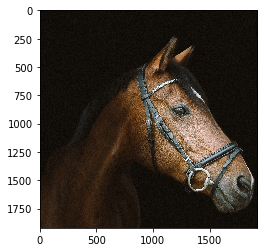

Original (1920, 1920, 3)


In [2]:
img_nome = "cavalo.jpg"
imagem = cv2.imread(img_nome,1)

plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.show()
print('Original', imagem.shape)

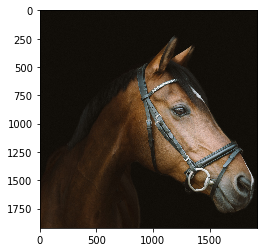

In [3]:
#suavizaçao da imagem
img_suavizada = cv2.GaussianBlur(imagem, (9,9),1)
plt.imshow(cv2.cvtColor(img_suavizada, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
img_cinza = cv2.cvtColor(img_suavizada, cv2.COLOR_RGB2GRAY)

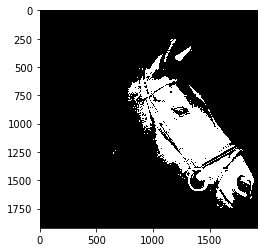

In [5]:
#Imagem segmentada 1
valor_retorno, img_binarizada = cv2.threshold(img_cinza, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(img_binarizada, cmap= 'gray')
plt.show()

Perda de detalhes do pescoço e tronco do animal.Portanto, a binarização por OTSU não obteve um bom resultado. 

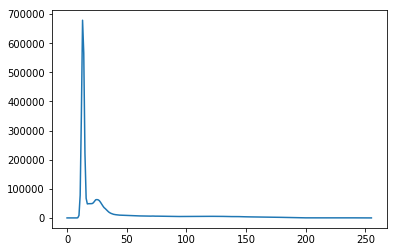

In [6]:
hist = cv2.calcHist([img_cinza], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()

No histograma, observe que o pico representa o fundo da imagem, pois são os tons de cinza mais próximos de preto, que se sobressaem na imagem.

Então, para escolher o limiar, temos que focar em separar este tom de "quase preto" dos demais tons da imagem, se observarmos o gráfico podemos inferir que os valores estão acima de 0 e abaixo de 50, na verdade valores em torno de 25 que é quase onde os tons estão acabando e começam os tons mais claros que pertencem ao cavalo.

Vamos escolher o limiar com o valor de 17, pelo fato de ser um valor baixo e do fundo da imagem ser bem escuro. Assim, todos os valores menores que 17 serão convertidos para zero. Com isso, o novo código ficará da seguinte forma:

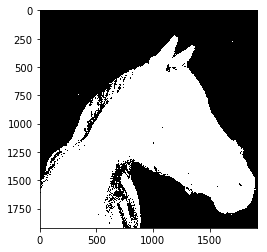

In [7]:
#Imagem segmentada 2
valor_retorno, img_binarizada = cv2.threshold(img_cinza, 17, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(img_binarizada, cv2.COLOR_BGR2RGB))
plt.show()